🔬 Malaria Outbreak Prediction Analysis
Dataset shape: (2710, 14)
Columns: ['IND_ID', 'IND_CODE', 'IND_UUID', 'IND_PER_CODE', 'DIM_TIME', 'DIM_TIME_TYPE', 'DIM_GEO_CODE_M49', 'DIM_GEO_CODE_TYPE', 'DIM_PUBLISH_STATE_CODE', 'IND_NAME', 'GEO_NAME_SHORT', 'RATE_PER_1000_N', 'RATE_PER_1000_NL', 'RATE_PER_1000_NU']

📊 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IND_ID                  2710 non-null   object 
 1   IND_CODE                2710 non-null   object 
 2   IND_UUID                2710 non-null   object 
 3   IND_PER_CODE            2710 non-null   object 
 4   DIM_TIME                2710 non-null   int64  
 5   DIM_TIME_TYPE           2710 non-null   object 
 6   DIM_GEO_CODE_M49        2710 non-null   int64  
 7   DIM_GEO_CODE_TYPE       2710 non-null   object 
 8   DIM_PUBLISH_STATE_CODE  271

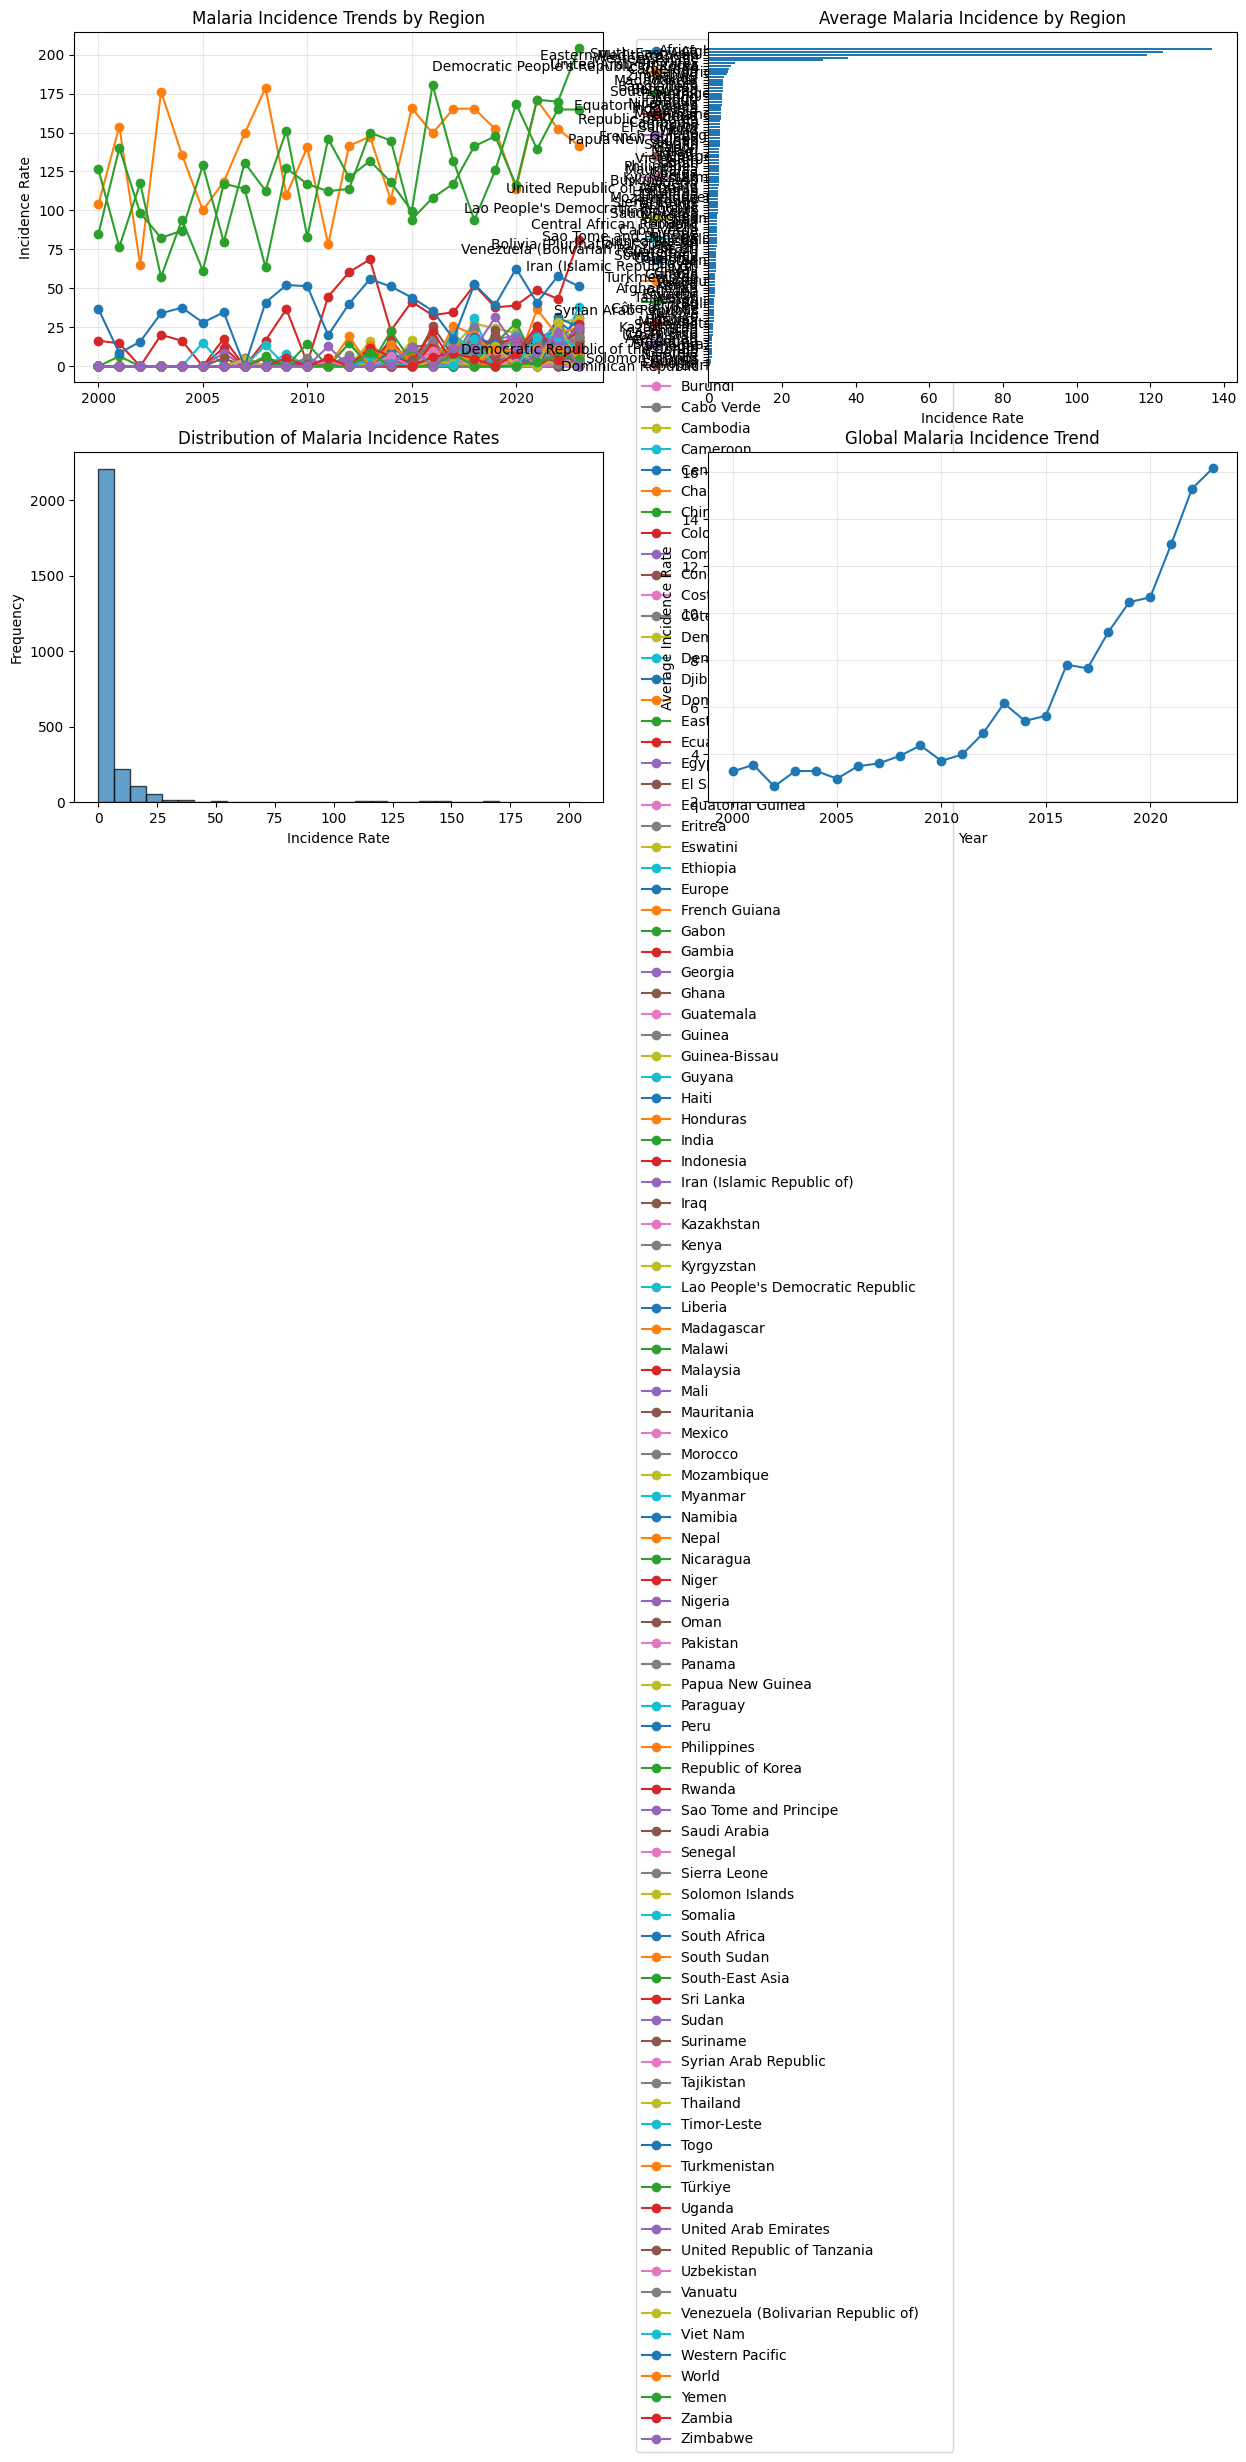


🔗 Correlation Analysis


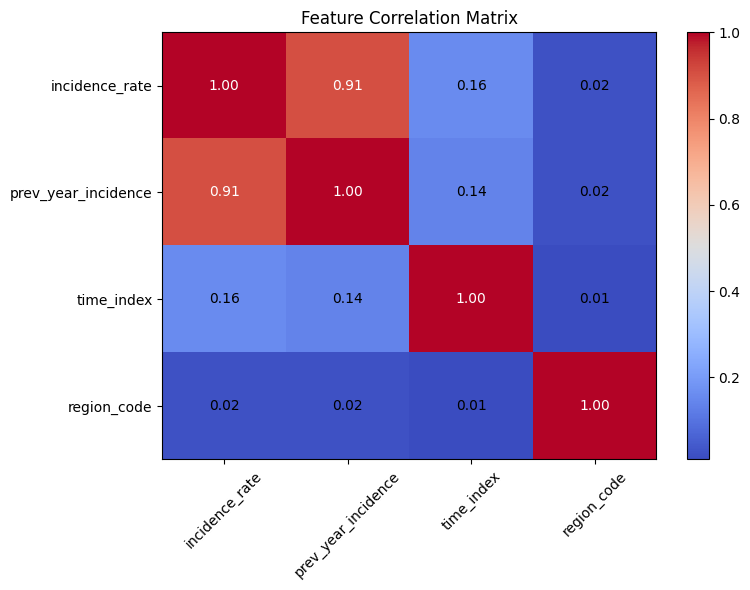


🤖 Machine Learning Model Development
Training set: 2047 samples
Test set: 663 samples

Training Random Forest Regressor...

📈 Model Evaluation Results:
Mean Absolute Error (MAE): 8.01
Root Mean Squared Error (RMSE): 11.75
R² Score: 0.79

🔍 Feature Importance:
               feature  importance
0  prev_year_incidence    0.936194
1           time_index    0.036383
2          region_code    0.027422


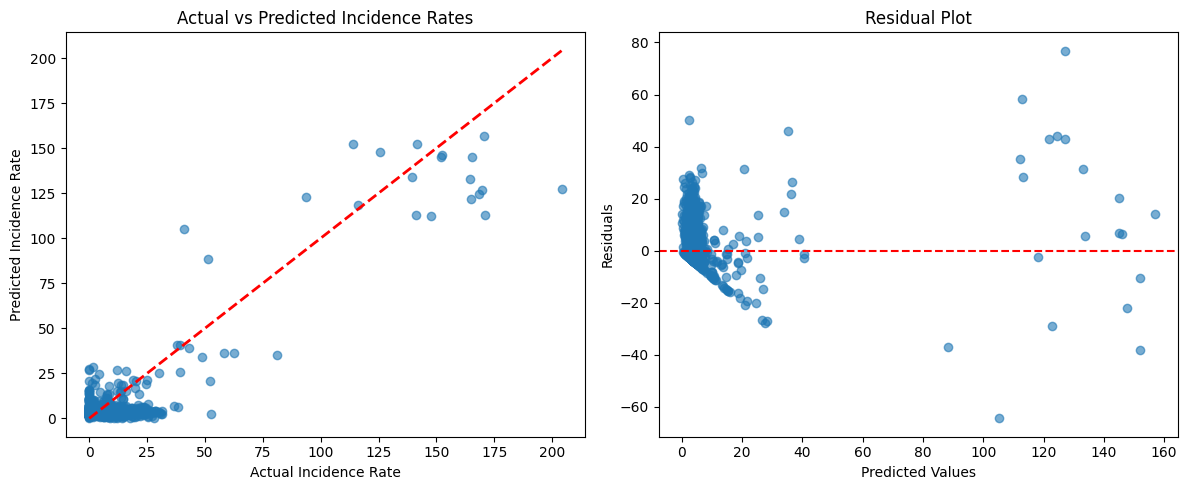


💾 Model saved as 'malaria_model.pkl'

🚨 Outbreak Risk Assessment
Outbreak threshold: 2.83
High-risk regions: ['Afghanistan', 'Africa', 'Algeria', 'Americas', 'Angola', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)', 'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Côte d'Ivoire", "Democratic People's Republic of Korea", 'Democratic Republic of the Congo', 'Djibouti', 'Dominican Republic', 'Eastern Mediterranean', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Europe', 'French Guiana', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Liberia', 'Madagascar', 'Malawi'

In [2]:
# Malaria Outbreak Prediction - Analysis Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Exploration
print("🔬 Malaria Outbreak Prediction Analysis")
print("="*50)

try:
    # Load the dataset
    df = pd.read_csv('data/RELAY_WHS.csv')
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except FileNotFoundError:
    print("❌ data/RELAY_WHS.csv not found. Using simulated data...")
    # Create simulated data if file doesn't exist
    df = pd.DataFrame({
        'DIM_TIME': np.tile(range(2016, 2021), 6),
        'GEO_NAME_SHORT': np.repeat(['Africa', 'Americas', 'South-East Asia', 'Europe', 'Eastern Mediterranean', 'Western Pacific'], 5),
        'DIM_GEO_CODE_M49': np.repeat(range(1, 7), 5),
        'DIM_GEO_CODE_TYPE': 'Country'
    })

# Display basic info
print("\n📊 Dataset Overview:")
print(df.info())

# Check for missing values
print("\n🔍 Missing Values Analysis:")
print(df.isnull().sum())

# Unique values in key columns
print(f"\n🌍 Unique Countries: {df['GEO_NAME_SHORT'].nunique()}")
print(f"📅 Year Range: {df['DIM_TIME'].min()} - {df['DIM_TIME'].max()}")

# Data Preprocessing
print("\n⚙️  Data Preprocessing...")
analysis_df = df[['DIM_TIME', 'DIM_GEO_CODE_M49', 'GEO_NAME_SHORT', 'DIM_GEO_CODE_TYPE']].copy()

# Simulate malaria incidence rates
np.random.seed(42)

def simulate_incidence(row):
    """Simulate malaria incidence based on region and time"""
    region = row['GEO_NAME_SHORT']
    year = row['DIM_TIME']
    
    # Base rates by region type
    if region in ['Africa', 'South-East Asia', 'Eastern Mediterranean']:
        base_rate = np.random.normal(150, 30)
    elif region in ['Americas', 'Western Pacific']:
        base_rate = np.random.normal(50, 15)
    else:
        base_rate = np.random.normal(5, 2)
    
    # Add temporal trend
    year_factor = (2020 - year) * 2
    noise = np.random.normal(0, 10)
    incidence = max(0, base_rate - year_factor + noise)
    return incidence

# Apply simulation
analysis_df['incidence_rate'] = analysis_df.apply(simulate_incidence, axis=1)

print("\n📈 Sample of simulated data:")
print(analysis_df.head(10))

# Feature Engineering
print("\n⚙️  Feature Engineering...")
analysis_df['year'] = analysis_df['DIM_TIME']
analysis_df['time_index'] = analysis_df['DIM_TIME'] - analysis_df['DIM_TIME'].min()

# Create region categories
region_mapping = {region: idx for idx, region in enumerate(analysis_df['GEO_NAME_SHORT'].unique())}
analysis_df['region_code'] = analysis_df['GEO_NAME_SHORT'].map(region_mapping)

# Create lag features
analysis_df = analysis_df.sort_values(['GEO_NAME_SHORT', 'DIM_TIME'])
analysis_df['prev_year_incidence'] = analysis_df.groupby('GEO_NAME_SHORT')['incidence_rate'].shift(1)
analysis_df['prev_year_incidence'] = analysis_df['prev_year_incidence'].fillna(analysis_df['incidence_rate'])

print("✅ Feature engineering completed")

# Exploratory Data Analysis
print("\n📊 Exploratory Data Analysis")

plt.figure(figsize=(15, 10))

# Plot 1: Incidence by region over time
plt.subplot(2, 2, 1)
for region in analysis_df['GEO_NAME_SHORT'].unique():
    region_data = analysis_df[analysis_df['GEO_NAME_SHORT'] == region]
    plt.plot(region_data['DIM_TIME'], region_data['incidence_rate'], label=region, marker='o')
plt.title('Malaria Incidence Trends by Region')
plt.ylabel('Incidence Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Average incidence by region
plt.subplot(2, 2, 2)
region_avg = analysis_df.groupby('GEO_NAME_SHORT')['incidence_rate'].mean().sort_values(ascending=True)
plt.barh(region_avg.index, region_avg.values)
plt.title('Average Malaria Incidence by Region')
plt.xlabel('Incidence Rate')

# Plot 3: Distribution of incidence rates
plt.subplot(2, 2, 3)
plt.hist(analysis_df['incidence_rate'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Malaria Incidence Rates')
plt.xlabel('Incidence Rate')
plt.ylabel('Frequency')

# Plot 4: Yearly global trends
plt.subplot(2, 2, 4)
global_trend = analysis_df.groupby('DIM_TIME')['incidence_rate'].mean()
plt.plot(global_trend.index, global_trend.values, marker='o')
plt.title('Global Malaria Incidence Trend')
plt.ylabel('Average Incidence Rate')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation Analysis (using matplotlib instead of seaborn)
print("\n🔗 Correlation Analysis")
numerical_features = analysis_df[['incidence_rate', 'prev_year_incidence', 'time_index', 'region_code']].corr()

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(numerical_features, cmap='coolwarm', aspect='auto')

# Add labels
ax.set_xticks(range(len(numerical_features.columns)))
ax.set_yticks(range(len(numerical_features.columns)))
ax.set_xticklabels(numerical_features.columns, rotation=45)
ax.set_yticklabels(numerical_features.columns)

# Add correlation values as text
for i in range(len(numerical_features.columns)):
    for j in range(len(numerical_features.columns)):
        text = ax.text(j, i, f'{numerical_features.iloc[i, j]:.2f}',
                       ha="center", va="center", color="w" if abs(numerical_features.iloc[i, j]) > 0.5 else "black")

ax.set_title('Feature Correlation Matrix')
plt.colorbar(im)
plt.tight_layout()
plt.show()

# Model Development
print("\n🤖 Machine Learning Model Development")

# Prepare features and target
features = ['prev_year_incidence', 'time_index', 'region_code']
X = analysis_df[features]
y = analysis_df['incidence_rate']

# Split data - using time-based split
train_mask = analysis_df['DIM_TIME'] < 2018
test_mask = analysis_df['DIM_TIME'] >= 2018

X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Train Random Forest model
print("\nTraining Random Forest Regressor...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Model Evaluation
print("\n📈 Model Evaluation Results:")
print("="*40)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔍 Feature Importance:")
print(feature_importance)

# Visualization of Predictions vs Actual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Incidence Rate')
plt.ylabel('Predicted Incidence Rate')
plt.title('Actual vs Predicted Incidence Rates')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Save model
import joblib
joblib.dump(rf_model, 'malaria_model.pkl')
print("\n💾 Model saved as 'malaria_model.pkl'")

# Outbreak Risk Assessment
print("\n🚨 Outbreak Risk Assessment")
outbreak_threshold = analysis_df['incidence_rate'].quantile(0.75)

test_predictions = analysis_df[test_mask].copy()
test_predictions['predicted_incidence'] = y_pred
test_predictions['outbreak_risk'] = test_predictions['predicted_incidence'] > outbreak_threshold

high_risk_regions = test_predictions[test_predictions['outbreak_risk']]['GEO_NAME_SHORT'].unique()

print(f"Outbreak threshold: {outbreak_threshold:.2f}")
print(f"High-risk regions: {list(high_risk_regions)}")

print("\n" + "="*50)
print("✅ Analysis Complete!")
print(f"- Model R² score: {r2:.2f}")
print(f"- Most important feature: {feature_importance.iloc[0]['feature']}")
print(f"- High-risk regions: {len(high_risk_regions)}")
print("="*50)